In [1]:
import numpy as np
import matplotlib.pyplot as plt
import velocyto as vcy
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from Jvis import JTSNEBASE, JTSNE
from sklearn.cluster import KMeans

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [3]:
expr_mat = pd.read_csv('data/GSE126074_CellLineMixture_SNAREseq_cDNA_counts.tsv', sep='\t')

In [4]:
#atac_mat = pd.read_csv('data/snare_seq/GSE126074_CellLineMixture_SNAREseq_chromatin_counts.tsv', sep = '\t')

# pre-processing gene expression data

In [5]:
scale_factor = 10000
expr_mat = expr_mat.values
expr_mat_log_t = np.log(scale_factor*expr_mat + 1.0)

In [6]:
expr_reduced = PCA(n_components=20).fit_transform(expr_mat_log_t.T)

In [7]:
joint_tsne = TSNE(init='random').fit_transform(expr_reduced)

In [8]:
from anndata import AnnData
import scanpy.api as sc
adata = AnnData(X=expr_reduced)
sc.pp.neighbors(adata, use_rep='X')
sc.tl.louvain(adata, key_added='louvain', resolution = 0.2)
louv_labels = np.array(adata.obs['louvain'].tolist())
louv_labels = [int(x) for x in louv_labels]

/home/vanhoan310/miniconda3/envs/tsne/lib/python3.7/site-packages/scanpy/api/__init__.py:7: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,


In [9]:
np.unique(louv_labels)

array([0, 1, 2, 3])

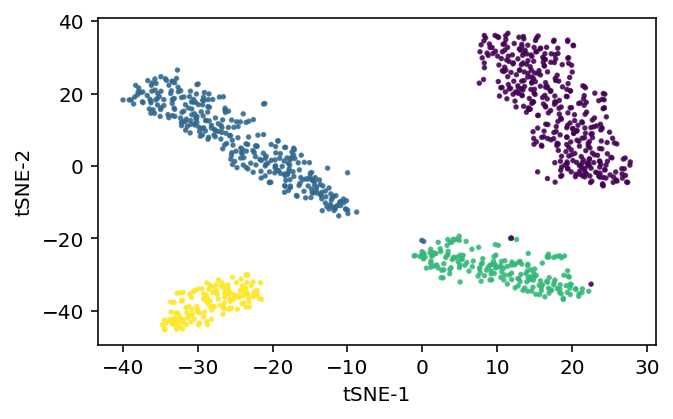

In [10]:
plt.figure(figsize=(5,3))
plt.scatter(joint_tsne[:,0], joint_tsne[:,1], s=3, c = louv_labels, alpha=0.8)
plt.xlabel('tSNE-1')
plt.ylabel('tSNE-2')
plt.show()

In [11]:
def make_noise_numpy_data_shuffle(expression_matrix, prop, random_seed):
    np.random.seed(random_seed)
    n_rows, n_cols = expression_matrix.shape
    n_elem = round(prop*n_cols)
    s = np.arange(n_cols)
    for i in range(n_rows):
        row_id = list(np.random.choice(s, size=n_elem, replace=False))
        v = expression_matrix[i, row_id]
        np.random.shuffle(v)
        expression_matrix[i, row_id] = v

In [12]:
louv_labels = np.array(louv_labels)

In [13]:
cl1 = 0
cl2 = 1
selected_cells = (louv_labels==cl1) + (louv_labels==cl2)
expr_matsub = expr_mat[:, selected_cells]
make_noise_numpy_data_shuffle(expression_matrix = expr_matsub, prop = 0.8, random_seed = 0)
expr_copy = np.copy(expr_mat)                     
expr_copy[:, selected_cells] = expr_matsub

In [14]:
expr_matsub.shape, expr_copy.shape

((18666, 716), (18666, 1047))

In [15]:
scale_factor = 10000
expr_mat_log_t = np.log(scale_factor*expr_copy + 1.0)
expr_reduced = PCA(n_components=20).fit_transform(expr_mat_log_t.T)
tsne = TSNE(init='random').fit_transform(expr_reduced)

In [16]:
from matplotlib.colors import ListedColormap
colours = ListedColormap(['r','b','g', 'orange'])
classes = ['H1', 'BJ', 'K562', 'GM12878']

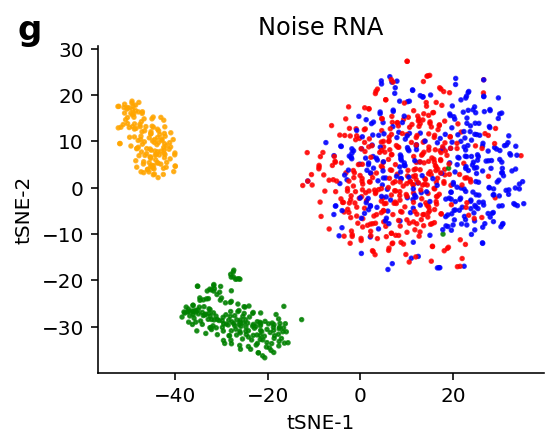

In [17]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
ax.scatter(tsne[:,0], tsne[:,1], s=3, c = louv_labels, alpha=0.8, cmap=colours)
# ax.legend(handles=scatter.legend_elements()[0], labels=classes, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax.set_xlabel('tSNE-1')
ax.set_ylabel('tSNE-2')
ax.set_title('Noise RNA')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
# plt.savefig('/data/hoan/plots/snare_tsne_noiseRNA.png', bbox_inches='tight')
plt.text(  # position text relative to Axes
    -0.18, 1.1, 'g', ha='left', va='top', size = 17, weight="bold", transform=ax.transAxes)
plt.savefig('/data/hoan/plots/snare_tsne_noiseRNA.pdf', bbox_inches='tight', pdi=800)
plt.show()

# ATAC-seq

In [18]:
atacTopic_mat = pd.read_csv('data/GSE126074_CellLineMixture_SNAREseq_chromatin_topics.tsv', sep = '\t') 

In [19]:
atac_reduced = PCA(n_components=10).fit_transform(atacTopic_mat.values.T)

In [20]:
atac_reduced.shape

(1047, 10)

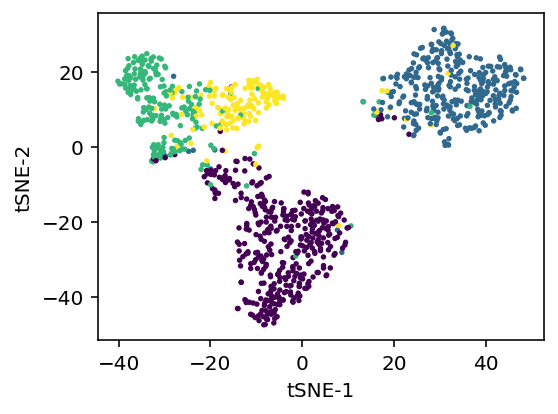

In [21]:
joint_tsne = TSNE(init='random').fit_transform(atac_reduced)
plt.figure(figsize=(4, 3))
plt.scatter(joint_tsne[:,0], joint_tsne[:,1], s=3, c = louv_labels)
plt.xlabel('tSNE-1')
plt.ylabel('tSNE-2')
plt.show()

In [22]:
# joint_tsne = TSNE(init='random').fit_transform(atacTopic_mat.values.T)
# plt.figure(figsize=(8,6))
# plt.scatter(joint_tsne[:,0], joint_tsne[:,1],s=3, c = louv_labels)
# plt.xlabel('tSNE-1')
# plt.ylabel('tSNE-2')
# plt.show()

# Random modalities

In [23]:
noise_matrix = np.random.rand(1047,20)

In [24]:
tsne_noisemodality = TSNE(init='pca').fit_transform(noise_matrix)

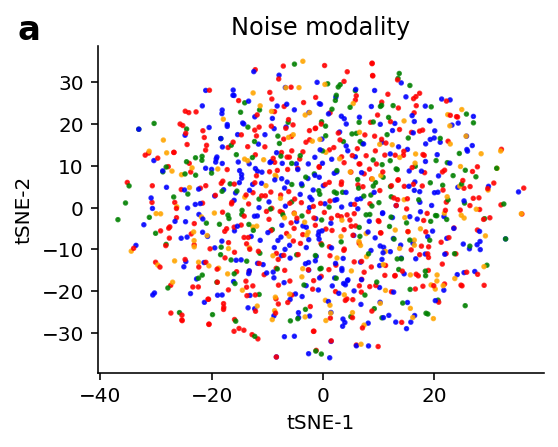

In [25]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
ax.scatter(tsne_noisemodality[:,0], tsne_noisemodality[:,1], s=3, c = louv_labels, alpha=0.8, cmap=colours)
ax.set_xlabel('tSNE-1')
ax.set_ylabel('tSNE-2')
ax.set_title('Noise modality')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
# plt.savefig('/data/hoan/plots/snare_tsne_noisemodality.png', bbox_inches='tight')
plt.text(  # position text relative to Axes
    -0.18, 1.1, 'a', ha='left', va='top', size = 17, weight="bold", transform=ax.transAxes)
plt.savefig('/data/hoan/plots/snare_tsne_noisemodality.pdf', bbox_inches='tight', pdi=800)
plt.show()

# Joint visualization

In [26]:
expr_reduced.shape

(1047, 20)

In [27]:
data = {'rna': expr_reduced, 'chromatin': atac_reduced}
joint_tsne_obj = JTSNE(init='pca')
joint_tsne = joint_tsne_obj.fit_transform(X = data)

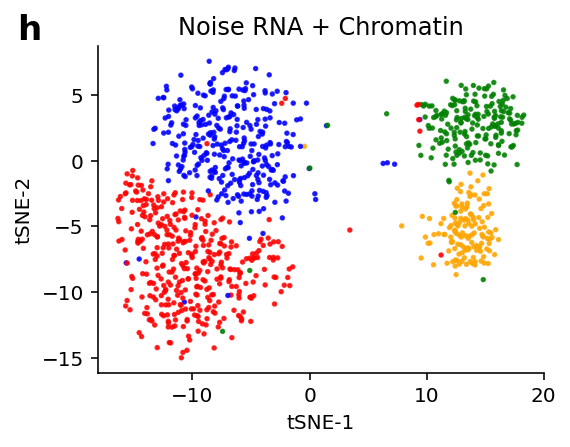

In [28]:
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111)
ax.scatter(joint_tsne[:,0], joint_tsne[:,1], s=3, c = louv_labels, alpha=0.8, cmap=colours)
ax.set_xlabel('tSNE-1')
ax.set_ylabel('tSNE-2')
ax.set_title('Noise RNA + Chromatin')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
# plt.savefig('/data/hoan/plots/snare_tsne_noiseRNA_Chromatin.png', bbox_inches='tight')
plt.text(  # position text relative to Axes
    -0.18, 1.1, 'h', ha='left', va='top', size = 17, weight="bold", transform=ax.transAxes)
plt.savefig('/data/hoan/plots/snare_tsne_noiseRNA_Chromatin.pdf', bbox_inches='tight', pdi=800)
plt.show()

In [29]:
joint_tsne_obj.cross_entropy, joint_tsne_obj.kl_divergence_

([2.663649320602417, 1.6960995197296143], 1.5774939060211182)

# Joint with noise

In [30]:
alpha = [1/3, 1/3, 1/3]
data = {'rna': expr_reduced, 'chromatin': atac_reduced, 'noise': noise_matrix}
joint_tsne_obj = JTSNEBASE(init='random', random_state = 1)
joint_tsne = joint_tsne_obj.fit_transform(X = data, alpha =alpha)

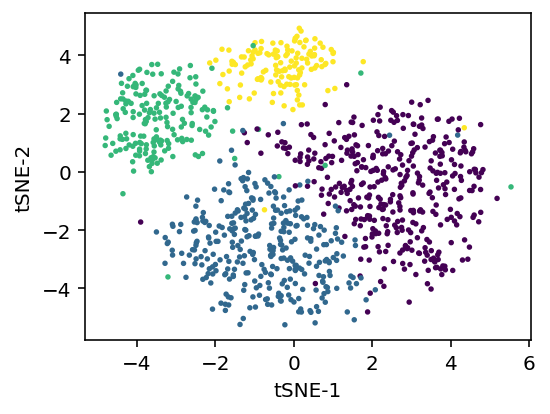

In [31]:
plt.figure(figsize=(4, 3))
plt.scatter(joint_tsne[:,0], joint_tsne[:,1],s=3, c = louv_labels)
plt.xlabel('tSNE-1')
plt.ylabel('tSNE-2')
plt.show()

In [32]:
joint_tsne_obj.cross_entropy, joint_tsne_obj.kl_divergence_

([2.662709951400757, 2.012216567993164, 3.9087448120117188],
 1.8666430711746216)

# Auto tunning

In [33]:
from sklearn.manifold import JTSNE

In [34]:
joint_tsne_obj = JTSNE(init='pca')
joint_tsne = joint_tsne_obj.fit_transform(X = data, method = 'auto', _lambda = 3)

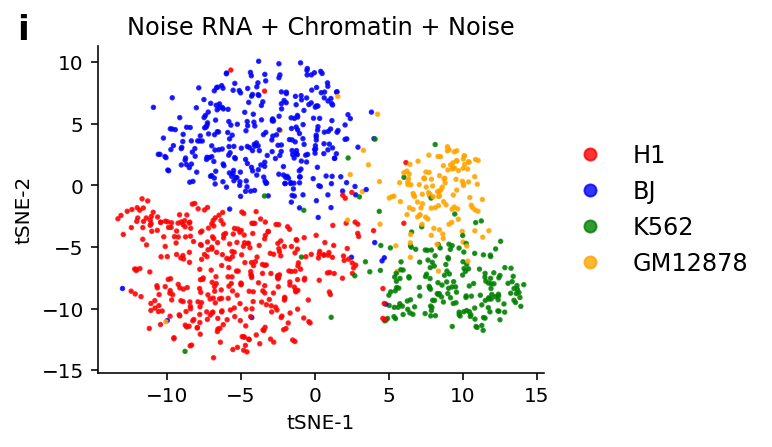

In [35]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
scatter =ax.scatter(joint_tsne[:,0], joint_tsne[:,1],s=3, c = louv_labels, alpha=0.8, cmap=colours)
lgd = ax.legend(handles=scatter.legend_elements()[0], labels=classes, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=12)
ax.set_xlabel('tSNE-1')
ax.set_ylabel('tSNE-2')
ax.set_title('Noise RNA + Chromatin + Noise')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
# plt.savefig('/data/hoan/plots/snare_tsne_3modalities.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.text(  # position text relative to Axes
    -0.18, 1.1, 'i', ha='left', va='top', size = 17, weight="bold", transform=ax.transAxes)
plt.savefig('/data/hoan/plots/snare_tsne_3modalities.pdf', bbox_inches='tight', pdi=800)
plt.show()

In [36]:
joint_tsne_obj.alpha

array([0.28368508, 0.52870888, 0.18760604])